#  US Census Data

**Summary**

In this project we have prepared a spreadsheet in csv format with the data of a census made for a number of states in the USA. This table contains income information for each gender and population type in that state.

**Scope**

The goal of this project is to identify and clean up the mistakes in csv files. With this project I want to deepen more knowledge in data processing, tyding and wrangling, also after cleaning the table I want to enter the field of data visualization, I want to make descriptive representation of data.
For this project I will mostly use the pandas and matplotlib libraries.

In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 

**Import and inspect data**
- display first 10 rows 
    - have a visual inspection on data 
        - column Index make no sense to keep it
        - there are NaN values 
        - ethnic columns would not be headers but rather values in an "Ethnicity" column
        - [GenderPop] column has both gender Male and Female population number 
        - Income column has dolar mark 
        - columns describing the ethnic size have percentage % mark 
        - upper case for state header column
- check types of the columns
 - df.dtypes
- check columns
 - df.columns
- check info
 - df.info()
- counts the unique value in each column 
 - df.nunique()
-  check the missing data: counts the number of missing value in each column 
- df.isna().sum()
- check the shape 
 - df.shape
- display distinct values for the columns
 - df['column'].value_counts()
- correct header from 'Hisppanic' to 'Hisppanic'

In [2]:
us_census = pd.read_csv('census_population.csv')
us_census.head(10)

,Index,STATE,TotalPop,Hisppanic,White,Black,Native,Asian,Pacific,Income,Gender Pop
0,0,Alabama,4830620.0,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375.0,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928.0,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208.0,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464.0,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,5,Colorado,5278906.0,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
6,0,Colorado,5278906.0,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
7,1,Connecticut,3593222.0,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607M_1841615F
8,2,Delaware,926454.0,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413M_478041F
9,3,District of Columbia,647484.0,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674M_340810F


In [3]:
us_census.dtypes

Index           int64
STATE          object
TotalPop      float64
Hisppanic      object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income         object
Gender Pop     object
dtype: object

In [4]:
us_census.columns

Index(['Index', 'STATE', 'TotalPop', 'Hisppanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'Income', 'Gender Pop'],
      dtype='object')

In [5]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
Index         64 non-null int64
STATE         64 non-null object
TotalPop      61 non-null float64
Hisppanic     64 non-null object
White         64 non-null object
Black         61 non-null object
Native        63 non-null object
Asian         63 non-null object
Pacific       56 non-null object
Income        64 non-null object
Gender Pop    64 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 5.6+ KB


In [6]:
us_census.nunique()

Index          6
STATE         51
TotalPop      49
Hisppanic     50
White         51
Black         47
Native        38
Asian         48
Pacific       17
Income        51
Gender Pop    51
dtype: int64

In [7]:
us_census.isna().sum()

Index         0
STATE         0
TotalPop      3
Hisppanic     0
White         0
Black         3
Native        1
Asian         1
Pacific       8
Income        0
Gender Pop    0
dtype: int64

In [8]:
us_census.Pacific.unique()

array(['0.03%', '1.06%', '0.17%', '0.15%', '0.35%', nan, '0.02%', '0.05%',
       '8.76%', '0.13%', '0.06%', '0.04%', '0.10%', '0.07%', '0.57%',
       '0.61%', '0.11%', '0.83%'], dtype=object)

In [9]:
us_census = us_census.rename({'Hisppanic' : 'Hispanic'}, axis = 1)
us_census.head()

,Index,STATE,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Gender Pop
0,0,Alabama,4830620.0,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375.0,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928.0,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208.0,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464.0,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


**Reshaping your data** 
1. Unpivot dataframe from a wide format to a long format. We'll make use of the melt() function 
    - frame = dataframe name 
    - id_vars = the columns we want to keep after transformation
    - value_vars = the columns headers of the old dataframe that you want to turn into the variables
    - var_name = how to call the new column of the DataFrame that stores the variables
    - value_name = how to call the new column of the dataframe that stores the values 
    


In [10]:
id_vars = ['STATE', 'TotalPop', 'Income', 'Gender Pop']
value_vars = ['Hisppanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
us_census = pd.melt(frame = us_census, id_vars = ['STATE', 'TotalPop', 'Income', 'Gender Pop'], value_vars = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'], var_name = 'Ethnicity', value_name = 'Percentage')
us_census.head()

,STATE,TotalPop,Income,Gender Pop,Ethnicity,Percentage
0,Alabama,4830620.0,"$43,296.36",2341093M_2489527F,Hispanic,3.75%
1,Alaska,733375.0,"$70,354.74",384160M_349215F,Hispanic,5.91%
2,Arizona,6641928.0,"$54,207.82",3299088M_3342840F,Hispanic,29.57%
3,Arkansas,2958208.0,"$41,935.63",1451913M_1506295F,Hispanic,6.22%
4,California,38421464.0,"$67,264.78",19087135M_19334329F,Hispanic,37.29%


**Drop duplicates**

2. Drop duplicates, get rid of the similar observations 
    - df.drop_duplicates() for all columns from table df['col_name'].drop_duplicates() for single column 

In [13]:
us_census.drop_duplicates()
us_census.shape

(384, 6)

**Rename header**

In [14]:
us_census = us_census.rename({'STATE' : 'State', 'Gender Pop' : 'GenderPop'}, axis = 1)
us_census.head(5)

,State,TotalPop,Income,GenderPop,Ethnicity,Percentage
0,Alabama,4830620.0,"$43,296.36",2341093M_2489527F,Hispanic,3.75%
1,Alaska,733375.0,"$70,354.74",384160M_349215F,Hispanic,5.91%
2,Arizona,6641928.0,"$54,207.82",3299088M_3342840F,Hispanic,29.57%
3,Arkansas,2958208.0,"$41,935.63",1451913M_1506295F,Hispanic,6.22%
4,California,38421464.0,"$67,264.78",19087135M_19334329F,Hispanic,37.29%


**Inspect new dataframe**

In [15]:
us_census.dtypes

State          object
TotalPop      float64
Income         object
GenderPop      object
Ethnicity      object
Percentage     object
dtype: object

In [16]:
us_census.isna().sum()

State          0
TotalPop      18
Income         0
GenderPop      0
Ethnicity      0
Percentage    13
dtype: int64

**we can use where() function to replace the values with "zero" to np.nan**
- there are no zero values 

In [17]:

us_census['TotalPop'] = us_census['TotalPop'].where(us_census == 0, np.nan)
us_census.isna().sum()

State          0
TotalPop      18
Income         0
GenderPop      0
Ethnicity      0
Percentage    13
dtype: int64

**Modify values into the columns** 
- make use of regex to turn the Income column into a format that is ready for conversion into numeric
- parse the string for comma and then convert it to numeric, use replace() function
- do the same for the percentage column 
- look at the GenderPop column, we want to separate this into two columns, the Men column and Women column
- split the columns into the new columns using str.split() function
    - use argument expand = True in this way the result should be a multiindex dataframe with two columns
- still remain M and F character in each entry! remove these before we convert.
- reinnoieste dataframe si indeparteaza coloana GenderPop

In [18]:
# clean up the "Income" column 
us_census['Income'] = us_census.Income.str.lstrip('$')
us_census['Income'] = us_census.Income.replace(to_replace = r'\,', value = '', regex = True)
us_census.Income = pd.to_numeric(us_census.Income)
us_census.head()

,State,TotalPop,Income,GenderPop,Ethnicity,Percentage
0,Alabama,4830620.0,43296.36,2341093M_2489527F,Hispanic,3.75%
1,Alaska,733375.0,70354.74,384160M_349215F,Hispanic,5.91%
2,Arizona,6641928.0,54207.82,3299088M_3342840F,Hispanic,29.57%
3,Arkansas,2958208.0,41935.63,1451913M_1506295F,Hispanic,6.22%
4,California,38421464.0,67264.78,19087135M_19334329F,Hispanic,37.29%


In [19]:
# play the same with "Percentage" column, turn it into numeric afterwards
us_census.Percentage = us_census.Percentage.str.strip('%')
us_census.Percentage = pd.to_numeric(us_census.Percentage)
us_census.head()

,State,TotalPop,Income,GenderPop,Ethnicity,Percentage
0,Alabama,4830620.0,43296.36,2341093M_2489527F,Hispanic,3.75
1,Alaska,733375.0,70354.74,384160M_349215F,Hispanic,5.91
2,Arizona,6641928.0,54207.82,3299088M_3342840F,Hispanic,29.57
3,Arkansas,2958208.0,41935.63,1451913M_1506295F,Hispanic,6.22
4,California,38421464.0,67264.78,19087135M_19334329F,Hispanic,37.29


In [20]:
# now, do some work for column GenderPop, read instruction above but do not forget to convert values into the numeric
splited_data = us_census.GenderPop.str.split(('\_'), expand = True)
splited_data[0] = splited_data[0].str.strip('M')
splited_data[0] = pd.to_numeric(splited_data[0])
splited_data[1] = splited_data[1].str.strip('F')
splited_data[1] = pd.to_numeric(splited_data[1])
us_census['Men'] = splited_data[0]
us_census['Women'] = splited_data[1]
us_census.head()

,State,TotalPop,Income,GenderPop,Ethnicity,Percentage,Men,Women
0,Alabama,4830620.0,43296.36,2341093M_2489527F,Hispanic,3.75,2341093,2489527.0
1,Alaska,733375.0,70354.74,384160M_349215F,Hispanic,5.91,384160,349215.0
2,Arizona,6641928.0,54207.82,3299088M_3342840F,Hispanic,29.57,3299088,3342840.0
3,Arkansas,2958208.0,41935.63,1451913M_1506295F,Hispanic,6.22,1451913,1506295.0
4,California,38421464.0,67264.78,19087135M_19334329F,Hispanic,37.29,19087135,19334329.0


In [21]:
# verify the columns types 
us_census.dtypes

State          object
TotalPop      float64
Income        float64
GenderPop      object
Ethnicity      object
Percentage    float64
Men             int64
Women         float64
dtype: object

In [22]:
# remove column Genderpop 
us_census.drop(['GenderPop'], axis = 1, inplace = True)
us_census.head()

,State,TotalPop,Income,Ethnicity,Percentage,Men,Women
0,Alabama,4830620.0,43296.36,Hispanic,3.75,2341093,2489527.0
1,Alaska,733375.0,70354.74,Hispanic,5.91,384160,349215.0
2,Arizona,6641928.0,54207.82,Hispanic,29.57,3299088,3342840.0
3,Arkansas,2958208.0,41935.63,Hispanic,6.22,1451913,1506295.0
4,California,38421464.0,67264.78,Hispanic,37.29,19087135,19334329.0


**Investigate columns content for nan and null values**
- use isna() to count the number of nan values for each column 
- same nan rows  have both columns Total Pop and Women, because we have no values to replace them we are going to remove these rows

In [23]:
print(us_census.isna().sum())

State          0
TotalPop      18
Income         0
Ethnicity      0
Percentage    13
Men            0
Women         18
dtype: int64


In [24]:
# fill in nan values with null in order to proceed calculations
# replace nan values with 0 for Women and Percentage columns 
us_census = us_census.fillna(value = {'Women' : 0})
us_census = us_census.fillna(value = {'Percentage' : 0})
us_census.head()

,State,TotalPop,Income,Ethnicity,Percentage,Men,Women
0,Alabama,4830620.0,43296.36,Hispanic,3.75,2341093,2489527.0
1,Alaska,733375.0,70354.74,Hispanic,5.91,384160,349215.0
2,Arizona,6641928.0,54207.82,Hispanic,29.57,3299088,3342840.0
3,Arkansas,2958208.0,41935.63,Hispanic,6.22,1451913,1506295.0
4,California,38421464.0,67264.78,Hispanic,37.29,19087135,19334329.0


In [25]:
# perform columns operation, renew TotalPop column by adding together women and men columns 
# perform columns calucalations by substracting men from from Total population to  renew Women column 
def add(x, y):
    return x + y
def difference(x, y):
    return x - y 
us_census['TotalPop'] = add(us_census.Women, us_census.Men)
us_census['Women'] = add(us_census.TotalPop, us_census.Men)
us_census.head()

,State,TotalPop,Income,Ethnicity,Percentage,Men,Women
0,Alabama,4830620.0,43296.36,Hispanic,3.75,2341093,7171713.0
1,Alaska,733375.0,70354.74,Hispanic,5.91,384160,1117535.0
2,Arizona,6641928.0,54207.82,Hispanic,29.57,3299088,9941016.0
3,Arkansas,2958208.0,41935.63,Hispanic,6.22,1451913,4410121.0
4,California,38421464.0,67264.78,Hispanic,37.29,19087135,57508599.0


In [26]:
# display nan values 
# conclusion is that we do not have any, because we already chnage them out
nan_rows = us_census[us_census.isna().any(axis = 1)]
nan_rows

,State,TotalPop,Income,Ethnicity,Percentage,Men,Women


In [27]:
# counting nan values 
us_census.isna().sum() 

State         0
TotalPop      0
Income        0
Ethnicity     0
Percentage    0
Men           0
Women         0
dtype: int64

**Vizual reprezentation**

1. Use matplotlib to draw a graph showing the average income for each state, in the first phase you can use the plot () function and you can also display a distribution of average income for the 50 states.

2. Create a new dataframe containing two columns, one column with ethnicity of individuals and second column average the census in percentage.Based on these two columns create a vizual reprezentation of ethinicity by census.

3. Let's compare the US population for each state, for that we need a bar representation. Add to this chart a title and labels for the x and y axis.

4. Your friend Yana is curious to know the difference between the number of males and females.

In [34]:
# sorting the values 
us_census.sort_values(by = 'State', ascending = True).reset_index(inplace = True)

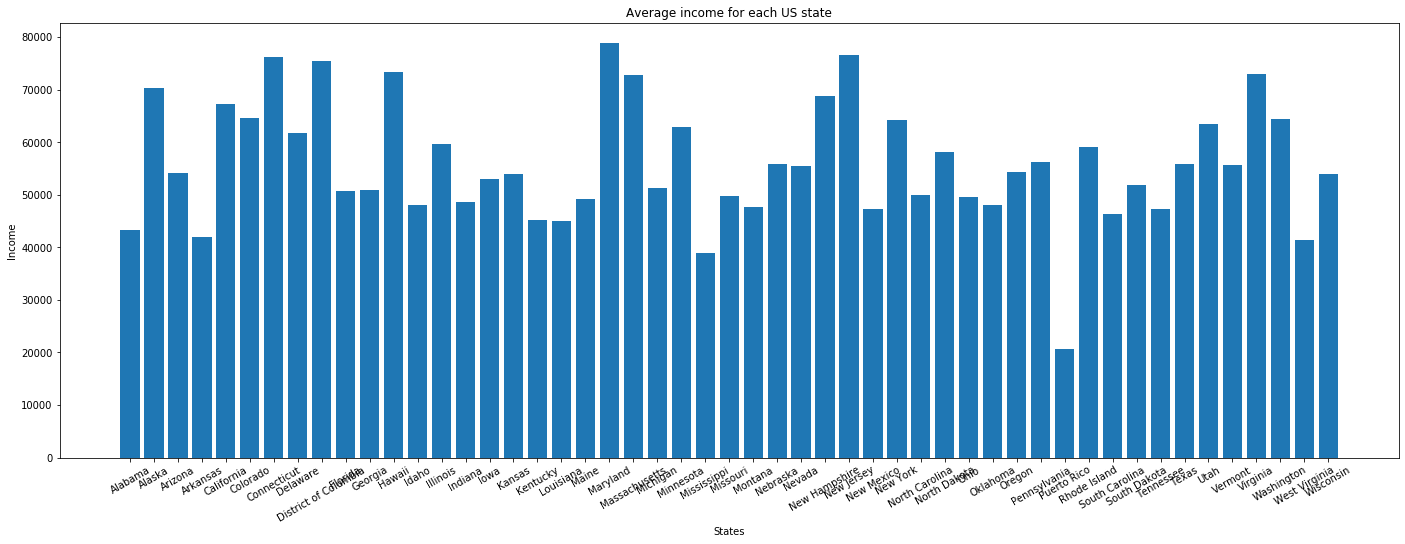

In [72]:
# create the subset dataframe by using groupby() function for filtering the states and average income for each location 
income_states = us_census.groupby('State').Income.mean().reset_index()
x1 = income_states.State.unique()
ax = plt.figure(figsize = (24, 8))
ax = plt.subplot()
x = range(len(income_states['State']))
plt.bar(x, income_states['Income'])
plt.xlabel('States')
plt.ylabel('Income')
plt.title("Average income for each US state")
ax.set_xticks(x)
ax.set_xticklabels(x1, rotation = 30)
plt.show()

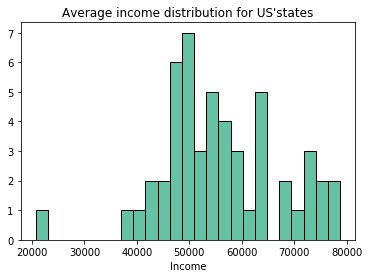

In [82]:
plt.hist(income_states['Income'], edgecolor = 'black', bins = 25)
plt.xlabel("Income")
plt.title("Average income distribution for US'states")
plt.show()

In [83]:
group2 = us_census.groupby('Ethnicity').Percentage.mean().reset_index()

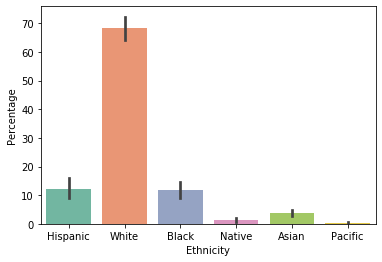

In [84]:
sns.set_palette('Set2')
sns.barplot(data = us_census, x = 'Ethnicity', y = 'Percentage')
plt.show()

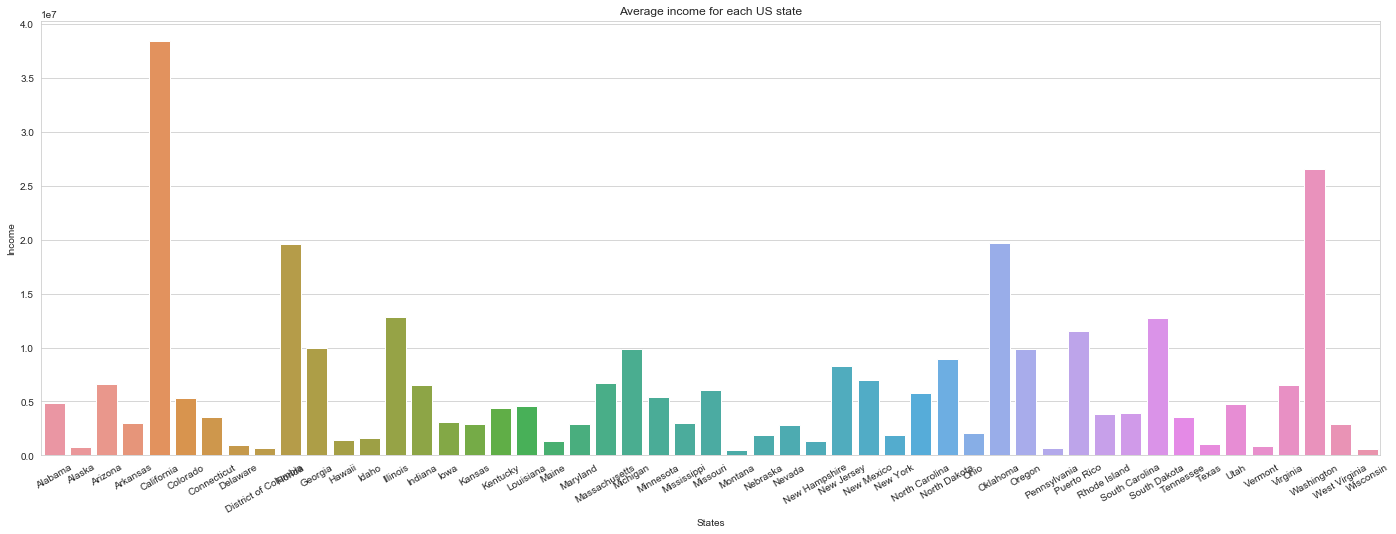

In [90]:
x1 = income_states.State.unique()
ax = plt.figure(figsize = (24, 8))
ax = plt.subplot()
sns.set_style('darkgrid')
sns.barplot(data= us_census, x = 'State', y = 'TotalPop' )
plt.xlabel('States')
plt.ylabel('Income')
plt.title("Average income for each US state")
ax.set_xticks(x)
ax.set_xticklabels(x1, rotation = 30)
plt.show()

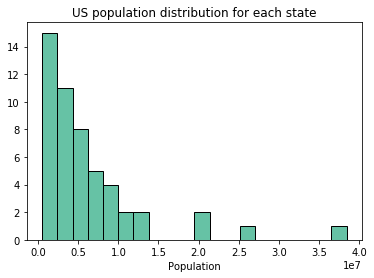

In [87]:
pop_states = us_census.groupby('State').TotalPop.mean().reset_index()
plt.hist(pop_states['TotalPop'], edgecolor = 'black', bins = 20)
plt.xlabel("Population")
plt.title("US population distribution for each state")
plt.show()

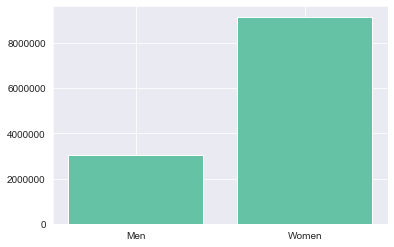

In [105]:
male = us_census.Men.mean()
female = us_census.Women.mean()
diff = female - male 
x = [1, 2]
y = [male, female]
ax = plt.subplot()
plt.bar(x, y)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Men', 'Women'])
plt.show()

In [106]:
print(diff)

6101972.828125
